In [64]:

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency,f_oneway
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,roc_auc_score,roc_curve
import matplotlib.pyplot as plt

In [2]:
ms_df=pd.read_csv("Microsoft_Data.csv")
ms_df.shape

(56756, 83)

In [3]:
0## non sence
non_sence=[]
for col in ms_df:
    if len(ms_df[col].value_counts())==1 or len(ms_df[col].value_counts())==ms_df.shape[0]:
        non_sence.append(col)
non_sence
ms_df.drop(columns=non_sence,inplace=True)


In [4]:
ms_df.shape

(56756, 76)

In [5]:
## correlation check cat to cat
correlated_columns_chi=[]

for col in ms_df:
    if ms_df[col].dtype=="object":
        new=pd.crosstab(ms_df[col],ms_df["HasDetections"])
        result=chi2_contingency(new)
        if result[1]<0.5:   # result will get in the tuple format index 1 denotie dthe p_value
            correlated_columns_chi.append(col)
correlated_columns_chi  ## -----> index 

        


['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [6]:
## correlation cont to cat
## args * ---> it passes columns one by one to f_oneway
corr_columns_anova=[]
for col in ms_df:
    if ms_df[col].dtype=="int64" or ms_df[col].dtype=="float64":
        result=list(ms_df["HasDetections"].value_counts().index)
        new=f_oneway(*(ms_df[ms_df["HasDetections"]==calls][col] for calls in result))
        
        if new[1]<0.05:
            
            corr_columns_anova.append(col)
corr_columns_anova
corr_df=correlated_columns_chi+corr_columns_anova
 
corr_df

['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing',
 'IsSxsPassiveMode',
 'CountryIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'Census_HasOpticalDiskDrive',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSUILocaleIdentifier',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'HasDetections']

In [7]:
corr_df=ms_df[corr_df]
corr_df


EngineVersion       AppVersion  AvSigVersion   Platform Processor  \
0       1.1.15100.1  4.18.1807.18075  1.273.1735.0  windows10       x64   
1       1.1.14600.4     4.13.17134.1    1.263.48.0  windows10       x64   
2       1.1.15100.1  4.18.1807.18075  1.273.1341.0  windows10       x64   
3       1.1.15100.1  4.18.1807.18075  1.273.1527.0  windows10       x64   
4       1.1.15100.1  4.18.1807.18075  1.273.1379.0  windows10       x64   
...             ...              ...           ...        ...       ...   
56751   1.1.15100.1  4.18.1807.18075  1.273.1056.0  windows10       x64   
56752   1.1.15100.1  4.18.1807.18075   1.273.689.0  windows10       x64   
56753   1.1.15200.1  4.18.1807.18075  1.275.1454.0  windows10       x64   
56754   1.1.15100.1  4.18.1807.18075  1.273.1527.0  windows10       x86   
56755   1.1.15200.1  4.18.1807.18075  1.275.1573.0  windows10       x64   

      OsPlatformSubRelease                                         OsBuildLab  \
0                      rs4           17134.1.amd64fre.rs4_release.180410-1804   
1                      rs4           17134.1.amd64fre.rs4_release.180410-1804   
2                      rs4           17134.1.amd64fre.rs4_release.180410-1804   
3                      rs4           17134.1.amd64fre.rs4_release.180410-1804   
4                      rs4           17134.1.amd64fre.rs4_release.180410-1804   
...                    ...                                                ...   
56751                  rs3  16299.431.amd64fre.rs3_release_svc_escrow.1805...   
56752                  rs4           17134.1.amd64fre.rs4_release.180410-1804   
56753                  rs4           17134.1.amd64fre.rs4_release.180410-1804   
56754                  rs4             17134.1.x86fre.rs4_release.180410-1804   
56755                  rs4           17134.1.amd64fre.rs4_release.180410-1804   

      SkuEdition   SmartScreen Census_MDC2FormFactor  ...  \
0            Pro           NaN               Desktop  ...   
1            Pro           NaN              Notebook  ...   
2           Home  RequireAdmin               Desktop  ...   
3            Pro  ExistsNotSet               Desktop  ...   
4           Home  RequireAdmin              Notebook  ...   
...          ...           ...                   ...  ...   
56751        Pro           NaN              Notebook  ...   
56752       Home  ExistsNotSet              Notebook  ...   
56753       Home  RequireAdmin               Desktop  ...   
56754        Pro  RequireAdmin               Desktop  ...   
56755       Home  RequireAdmin              Notebook  ...   

      LocaleEnglishNameIdentifier OsBuild OsSuite Census_HasOpticalDiskDrive  \
0                             171   17134     256                          0   
1                              64   17134     256                          0   
2                              49   17134     768                          0   
3                             115   17134     256                          0   
4                              75   17134     768                          0   
...                           ...     ...     ...                        ...   
56751                         182   16299     256                          0   
56752                          75   17134     768                          1   
56753                         251   17134     768                          0   
56754                          64   17134     256                          0   
56755                          56   17134     768                          0   

      Census_OSBuildNumber Census_OSBuildRevision Census_OSUILocaleIdentifier  \
0                    17134                    165                         119   
1                    17134                      1                          31   
2                    17134                    165                          30   
3                    17134                    228                          64   
4                    17134       

In [8]:
y=corr_df["HasDetections"]
corr_df.drop(columns=["HasDetections"],inplace=True)


In [9]:
x_train,x_test,y_train,y_test=train_test_split(corr_df,y,test_size=0.20,random_state=43)

In [10]:
## missing values for cont
## edokati adulo em levu
for col in x_train:
    if x_train[col].dtype=="int64" or x_train[col].dtype=="float64":
        x_train[col].fillna(x_train[col].mean(),inplace=True)
        x_test[col].fillna

In [13]:
drop=list(x_test.isnull().sum()[(x_test.isnull().sum()>200)].index)
x_test.drop(columns=drop,inplace=True)
x_train.drop(columns=drop,inplace=True)

In [14]:
##v scaling cont columns
scaler=StandardScaler()
cont=[i for i in x_train if x_train[i].dtype=="int64" or  x_train[i].dtype=="float64"]
for col in cont:
    x_train[col]=scaler.fit_transform(np.array(x_train[col]).reshape(-1,1)) #fit transform-->>takes train data  mean
    x_test[col]=scaler.transform(np.array(x_test[col]).reshape(-1,1))       ## transform --> takes mean from train mean
      

    


In [ ]:
x_train[cont]

In [39]:
## onehot encoding for cat columns
cat=[i for i in x_train if x_train[i].dtype=="object"]
oe_train=pd.get_dummies(x_train[cat])
oe_test=pd.get_dummies(x_test[cat])

In [40]:
final_train,final_test=oe_train.align(oe_test,join="inner",axis=1)

In [45]:
final_trains=pd.concat([x_train[cont],final_train],axis=1)
final_tests=pd.concat([x_test[cont],final_test],axis=1)

In [49]:
harsha=LogisticRegression()
harsha.fit(final_trains,y_train)
test_pred=harsha.predict(final_tests)

In [52]:
## test accuracy
accuracy_score(test_pred,y_test)


0.563953488372093

In [53]:
## train acc
train_pred=harsha.predict(final_trains)
accuracy_score(train_pred,y_train)

0.6101004316800281

In [54]:
recall_score(test_pred,y_test)

0.5643580800531474

In [55]:
precision_score(test_pred,y_test)

0.5935371179039302

In [56]:
f1_score(test_pred,y_test)

0.5785799421079517

In [98]:
pos_probs=harsha.predict_proba(final_tests)[::,1]
#fpr,tpr,threshold=roc_curve(y_test,pos_probs)

In [104]:
new=harsha.predict_proba(final_tests)


array([0.33053575, 0.41942336, 0.29622528, ..., 0.62630501, 0.70463162,
       0.57983528])

In [103]:
new[::,1]

array([0.33053575, 0.41942336, 0.29622528, ..., 0.62630501, 0.70463162,
       0.57983528])

([<matplotlib.lines.Line2D at 0x17f8093c9a0>], 0.5907206287837105)

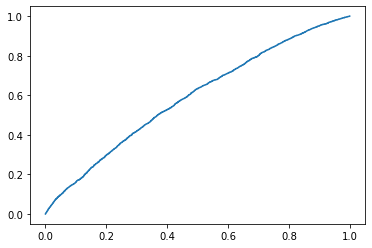

In [66]:
plt.plot(fpr,tpr),roc_auc_score(y_test,pos_probs)

In [ ]:
## decission tree chuddam hm ok 

In [67]:
from sklearn.tree import DecisionTreeClassifier
assumptions
--> linear relationship 
--> no multydfsgahj
->no hetrosesedicuchcyd
--> exists homoseducticity

In [115]:
teja=DecisionTreeClassifier(max_depth=75)
teja.fit(final_trains,y_train)
teja_test_pred=teja.predict(final_tests)

In [118]:
## dt test accuracy
accuracy_score(teja_test_pred,y_test)

0.5326814658210007

In [116]:
## train acc
teja_train_pred=teja.predict(final_trains)
accuracy_score(teja_train_pred,y_train)

0.9832613866619682

In [ ]:
#DT    
#dtc---both-- max ig,op cat ip cont---max ig
#dtr---var red ip op cont op-var,x5--x1------var red
#leaf node ---0  entorpy less entropy    max depth



In [ ]:
# random forest
